## Data Files

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# neurodiffeq modules
from neurodiffeq import diff
from neurodiffeq.ode import solve  
from neurodiffeq.conditions import IVP 
from neurodiffeq.monitors import Monitor1D
from neurodiffeq.ode import solve_system
from neurodiffeq.solvers import Solver1D

## Initialization of equations

**Note:**
r in the equations denotes rho where rho = r / sigma and \sigma = \frac{2 G M}{c^2}

In [4]:
# ricci tensor equations
# first equation is R_00 and 2nd is R_11
def ricci_tensor(alpha, beta, r): return [
    diff(alpha, r, order=2) + diff(alpha, r, order=1) * diff(alpha, r, order=1) -
    diff(beta, r, order=1) * diff(alpha, r, order=1) +
    2 * (1/r) * diff(alpha, r, order=1),
    diff(alpha, r, order=2) + diff(alpha, r, order=1) * diff(alpha, r, order=1) -
    diff(beta, r, order=1) * diff(alpha, r, order=1) -
    2 * (1/r) * diff(beta, r, order=1)
]

In [5]:
# expanded ricci tensors equations
# first equation is R_00 + R_11 and 2nd is R_22
def expanded_ricci_tensor(alpha, beta, r): return [
    diff(alpha, r, order=1) + diff(beta, r, order=1),
    np. exp(-2 * beta) * (r * (diff(beta, r, order=1) - diff(alpha, r, order=1)) - 1) + 1
]

In [6]:
# when r tends to infinite, alpha & beta tends to 1
# and rho also tends to some finitely large number
init_vals = [
    IVP(t_0=50, u_0=0.0),
    IVP(t_0=50, u_0=0.0)
]

## Running the solver

### Using the depreciated solver

/home/liza/.local/lib/python3.6/site-packages/neurodiffeq/ode.py:262: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  FutureWarning,
/home/liza/.local/lib/python3.6/site-packages/torch/optim/adam.py:48: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  super(Adam, self).__init__(params, defaults)
/home/liza/.local/lib/python3.6/site-packages/neurodiffeq/solvers.py:413: UserWarning: Passing `monitor` is deprecated, use a MonitorCallback and pass a list of callbacks instead
  warnings.warn("Passing `monitor` is deprecated, "


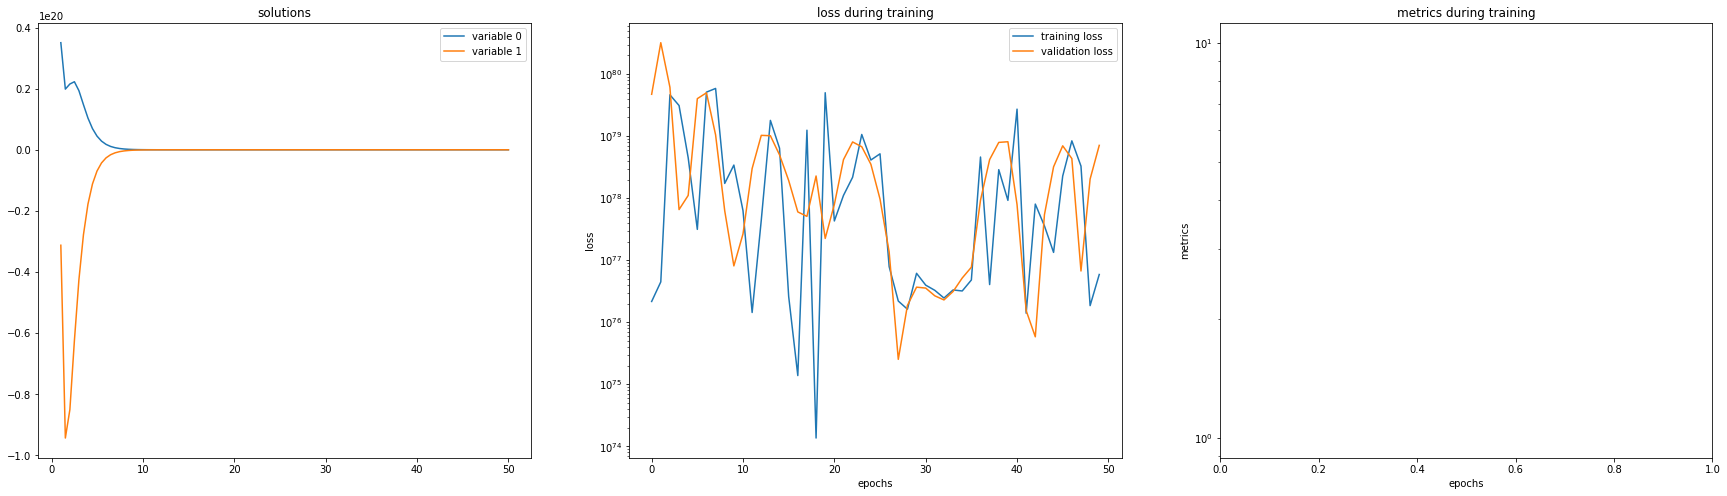

In [7]:
# solve system of equations
solution, loss = solve_system(
    ode_system=ricci_tensor, 
    conditions=init_vals, 
    t_min=1, 
    t_max=50,
    max_epochs=2000,
    monitor=Monitor1D(t_min=1, t_max=50, check_every=50)
)

In [ ]:
solver = Solver1D(
    ode_system=ricci_tensor,
    conditions=init_vals,
    t_min=1,
    t_max=100,
    # nets=nets,
    # train_generator=Generator2D(
    #     (32, 32), (0, 0), (1, 1), method='equally-spaced-noisy'),
    # valid_generator=Generator2D(
    #     (32, 32), (0, 0), (1, 1), method='equally-spaced'),
)

## Plotting the Solution

In [79]:
ts = np.linspace(0, 120, 1000)
alpha, beta = solution(ts, to_numpy=True)

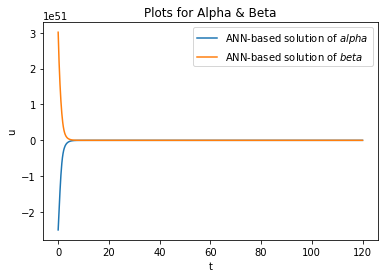

In [80]:
plt.figure()
plt.plot(ts, alpha, label='ANN-based solution of $alpha$')
plt.plot(ts, beta, label='ANN-based solution of $beta$')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Plots for Alpha & Beta')
plt.legend()
plt.show()

## Plotting the Loss Function

In [83]:
ts = np.linspace(0, 2000, 2000)

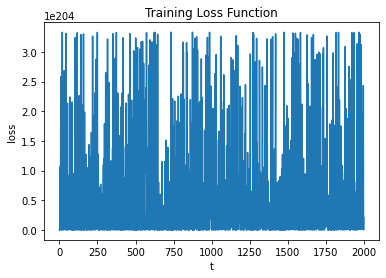

In [85]:
plt.figure()
plt.plot(ts, loss['train_loss'])
plt.ylabel('loss')
plt.xlabel('t')
plt.title('Training Loss Function')
plt.show()